# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

Paso 1: Instalación de dependencias

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re


Paso 2: Descargar HTML

In [2]:
url = 'https://juegosdelamesaredonda.com/'
response = requests.get(url)
response.status_code


415

In [3]:
response.content

b'<html>\r\n<head><title>415 Unsupported Media Type</title></head>\r\n<body>\r\n<center><h1>415 Unsupported Media Type</h1></center>\r\n<hr><center>openresty/1.27.1.1</center>\r\n</body>\r\n</html>\r\n'

Paso 3: Transforma el HTML

In [4]:
soup = BeautifulSoup(response.content)
soup


<html>
<head><title>415 Unsupported Media Type</title></head>
<body>
<center><h1>415 Unsupported Media Type</h1></center>
<hr/><center>openresty/1.27.1.1</center>
</body>
</html>

In [5]:
products = soup.find_all('div', class_='product-meta')
len(products), products[0] 


IndexError: list index out of range

In [ ]:
price_tag = soup.find_all('span', class_='price')
price_tag[0]

<span aria-label="Precio" class="price">
                          22,49 €
              </span>

In [ ]:
productsp = soup.find_all('div', class_= 'product-price-and-shipping')
productsp[0]


<div class="product-price-and-shipping">
<span aria-label="Precio regular" class="regular-price">24,99 €</span>
<span class="discount-percentage discount-product">-10%</span>
<span aria-label="Precio" class="price">
                          22,49 €
              </span>
</div>

Paso 4: Procesa el DataFrame

In [ ]:
products = soup.find_all('div', class_='product-meta')
len(products), products[0] 
list_products = []
for product in products:
    product_name = product.find_all('h3', class_='h3 product-title')
    price = product.find_all('span', class_='price')
    price_line = price[0].text
    price_clean =  re.findall(r'\d+[.,]?\d*', price_line)
    
    list_products.append({'name': product_name[0].text,
                          'price': price_clean[0]})
list_products 

[{'name': 'Star Wars Unlimited: Jump to Lightspeed Carbonite Booster',
  'price': '22,49'},
 {'name': 'Escape de Stalingrado Z - Recargado', 'price': '46,71'},
 {'name': 'Arkham Horror: El Juego de Rol', 'price': '47,45'},
 {'name': 'Naruto Shippuden: Combates de Ninjas', 'price': '22,46'},
 {'name': 'Crucero Galactico', 'price': '114,95'},
 {'name': 'The Witcher: Gwent (Castellano)', 'price': '44,96'},
 {'name': 'Dungeons and Dragons: Guia del Dungeon Master Nueva Edicion (castellano)',
  'price': '42,70'},
 {'name': 'Jungle Speed Giant', 'price': '22,46'},
 {'name': 'Mazmorra: One Deck Dungeon (castellano)', 'price': '19,76'},
 {'name': 'Exploding Kittens: El Juego de Tablero - Edicion Super Fan',
  'price': '26,96'},
 {'name': 'Pequeños Grandes Reinos', 'price': '23,96'},
 {'name': 'Star Wars: Imperial Assault', 'price': '98,96'},
 {'name': 'Cthulhu: Death May Die (castellano)', 'price': '98,96'},
 {'name': 'La llamada de Cthulhu: Caja de inicio - Edicion Revisada',
  'price': '35,6

In [ ]:
df = pd.DataFrame(list_products)
df

,name,price
0,Star Wars Unlimited: Jump to Lightspeed Carbon...,"22,49"
1,Escape de Stalingrado Z - Recargado,"46,71"
2,Arkham Horror: El Juego de Rol,"47,45"
3,Naruto Shippuden: Combates de Ninjas,"22,46"
4,Crucero Galactico,"114,95"
5,The Witcher: Gwent (Castellano),"44,96"
6,Dungeons and Dragons: Guia del Dungeon Master ...,"42,70"
7,Jungle Speed Giant,"22,46"
8,Mazmorra: One Deck Dungeon (castellano),"19,76"
9,Exploding Kittens: El Juego de Tablero - Edici...,"26,96"


Paso 5: Almacena los datos en sqlite

In [ ]:
df['price_float'] = df['price'].str.replace(',', '.')
df

,name,price,price_float
0,Star Wars Unlimited: Jump to Lightspeed Carbon...,"22,49",22.49
1,Escape de Stalingrado Z - Recargado,"46,71",46.71
2,Arkham Horror: El Juego de Rol,"47,45",47.45
3,Naruto Shippuden: Combates de Ninjas,"22,46",22.46
4,Crucero Galactico,"114,95",114.95
5,The Witcher: Gwent (Castellano),"44,96",44.96
6,Dungeons and Dragons: Guia del Dungeon Master ...,"42,70",42.70
7,Jungle Speed Giant,"22,46",22.46
8,Mazmorra: One Deck Dungeon (castellano),"19,76",19.76
9,Exploding Kittens: El Juego de Tablero - Edici...,"26,96",26.96


Paso 6: Visualiza los datos

/tmp/ipykernel_19066/2035794289.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_float',


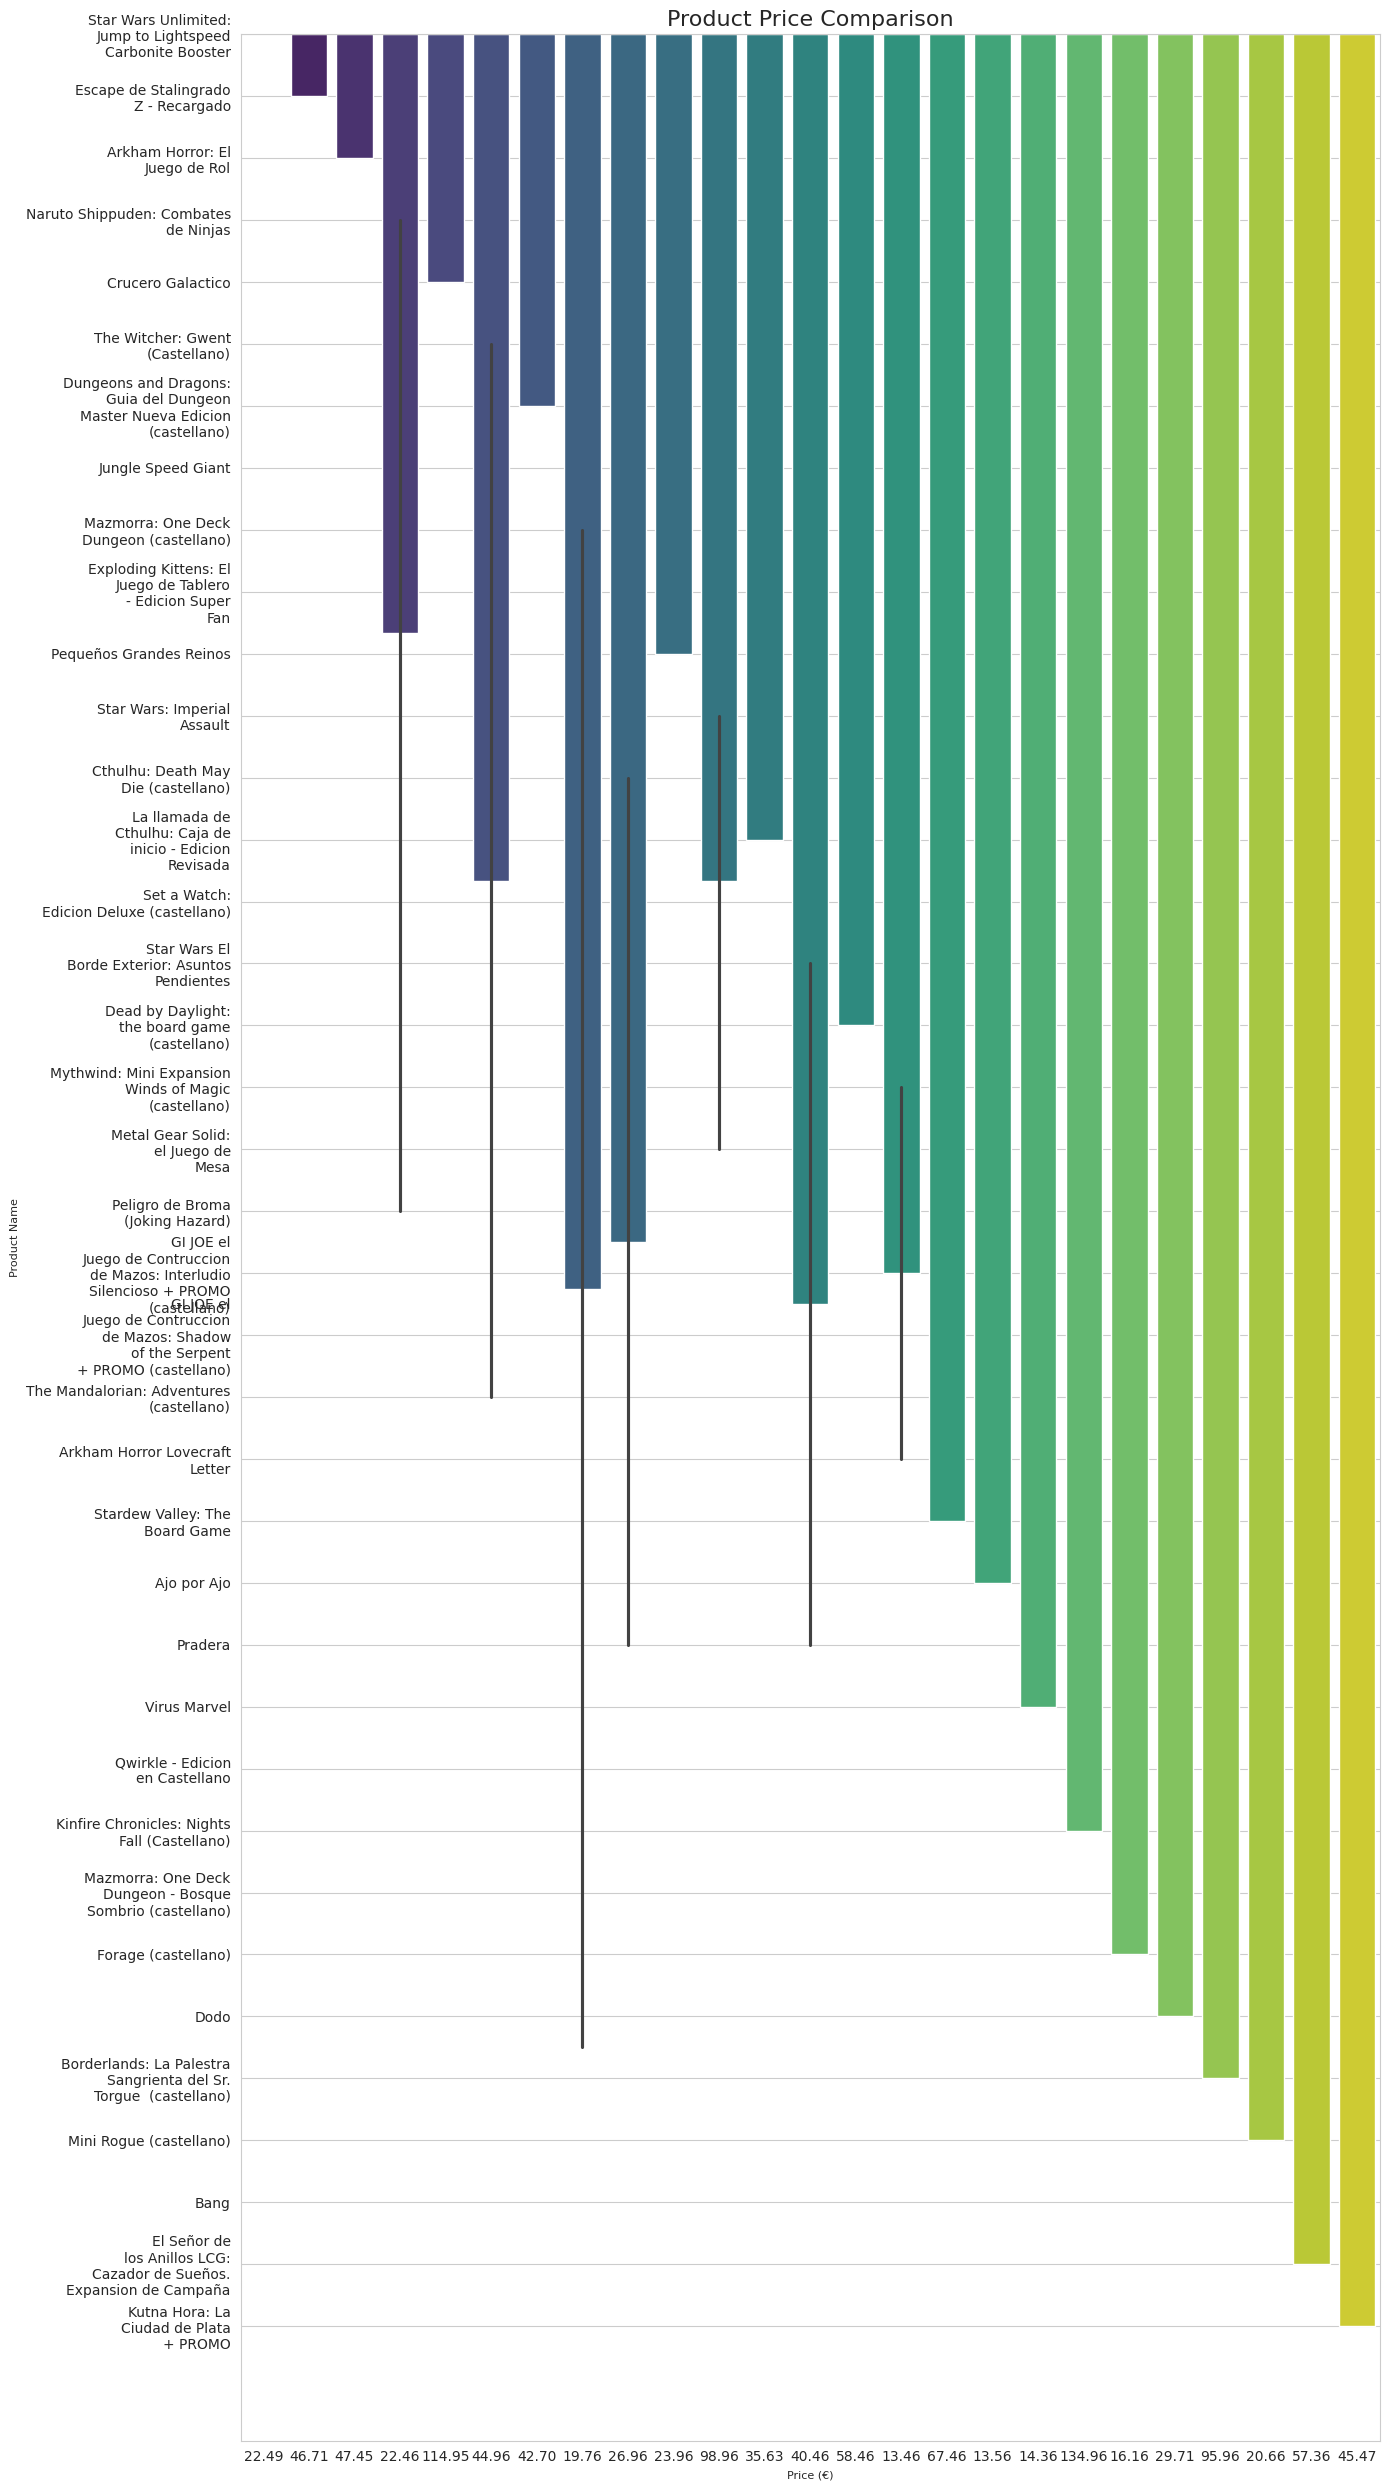

In [ ]:
def wrap_labels(text, width=3):
    """Splits a string into lines, breaking after every 'width' words."""
    words = text.split(' ')
    wrapped_lines = []
    for i in range(0, len(words), width):
        wrapped_lines.append(' '.join(words[i:i+width]))
    return '\n'.join(wrapped_lines)

# Apply wrapping to the 'name' column
df['wrapped_name'] = df['name'].apply(lambda x: wrap_labels(x, width=3))
sns.set_style("whitegrid")
plt.figure(figsize=(14, 25))
sns.barplot(x='price_float',
            y=df['wrapped_name'],
            data=df.sort_values(by='price_float'),
            palette="viridis")


plt.title('Product Price Comparison', fontsize=16)
plt.xlabel('Price (€)', fontsize=8)
plt.ylabel('Product Name', fontsize=8)
plt.tight_layout() 
plt.show()